## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [3]:
Fuel = pd.read_csv('FuelEconomy.csv')

In [4]:
Fuel.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739


In [5]:
Fuel.tail()

,Horse Power,Fuel Economy (MPG)
95,162.810542,27.418661
96,266.869640,15.989945
97,243.831211,19.253375
98,140.959803,29.515593
99,184.123053,25.196097


In [6]:
Fuel.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [7]:
Fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Horse Power           100 non-null float64
Fuel Economy (MPG)    100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


## Visualising the data

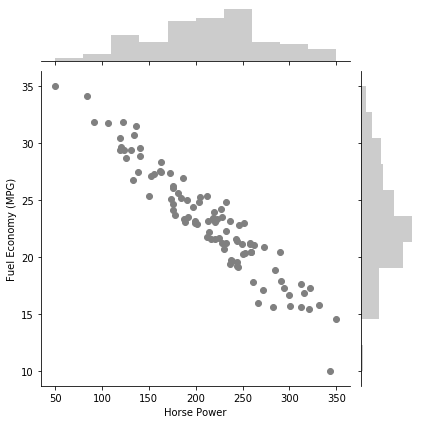

In [9]:
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data=Fuel, color='gray')

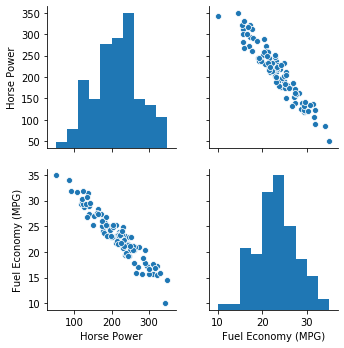

In [10]:
sns.pairplot(Fuel)

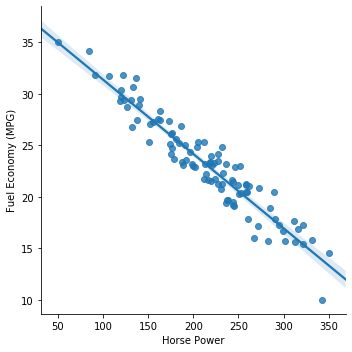

In [11]:
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=Fuel)

## Splitting dataset into training and testing data

In [14]:
X = Fuel[['Horse Power']]

In [32]:
y = Fuel['Fuel Economy (MPG)']

In [16]:
X

,Horse Power
0,118.770799
1,176.326567
2,219.262465
3,187.310009
4,218.594340
...,...
95,162.810542
96,266.869640
97,243.831211
98,140.959803


In [33]:
y

0     29.344195
1     24.695934
2     23.952010
3     23.384546
4     23.426739
        ...    
95    27.418661
96    15.989945
97    19.253375
98    29.515593
99    25.196097
Name: Fuel Economy (MPG), Length: 100, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [36]:
X_train

,Horse Power
18,123.885698
30,350.000000
73,261.852110
33,282.604246
90,237.673085
...,...
60,230.462677
71,299.530458
14,211.729109
92,227.380124


In [37]:
y_train

18    29.393330
30    14.589079
73    21.050399
33    15.676316
90    19.723462
        ...    
60    20.715722
71    16.693369
14    25.341892
92    24.181109
51    17.873266
Name: Fuel Economy (MPG), Length: 90, dtype: float64

In [38]:
X_test

,Horse Power
83,232.216607
53,250.709289
70,223.179649
45,132.669569
44,227.670465
39,252.552386
22,122.040161
80,198.958315
10,321.840752
0,118.770799


In [39]:
y_test

83    21.216359
53    20.291766
70    23.307192
45    26.778148
44    21.205987
39    20.407571
22    31.796612
80    23.172223
10    17.300628
0     29.344195
Name: Fuel Economy (MPG), dtype: float64

## Training

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [-0.07303224]
Linear Model Coefficient (b) 38.79558985751282


## Testing

In [42]:
y_predict = regressor.predict(X_test)

In [43]:
y_predict

array([21.83629003, 20.48572801, 22.49627934, 29.10643353, 22.16830496,
       20.35112249, 29.88272306, 24.26521773, 15.29083764, 30.12149194])

Text(0.5, 1.0, 'Fuel Economy (MPG) vs Horse Power (Training set)')

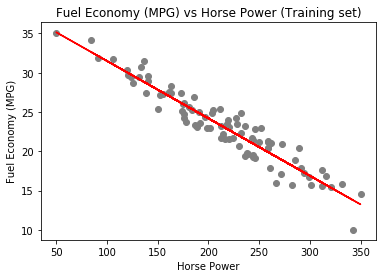

In [44]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.ylabel('Fuel Economy (MPG)')
plt.xlabel('Horse Power')
plt.title('Fuel Economy (MPG) vs Horse Power (Training set)')

Text(0.5, 1.0, 'Fuel Economy (MPG) vs Horse Power (Test set)')

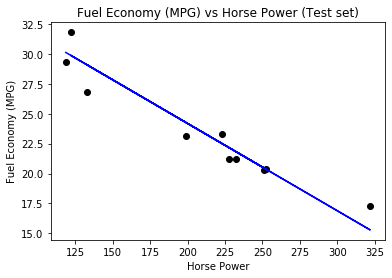

In [45]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.ylabel('Fuel Economy (MPG)')
plt.xlabel('Horse Power')
plt.title('Fuel Economy (MPG) vs Horse Power (Test set)')

In [46]:
print(regressor.predict([[150]]))

[27.84075331]
